## IMPORT LIBRARY

In [80]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import pickle
import json

# Problem Statement

In [2]:
#To predict patient is diabetic or non diabetic using KNN classifier.

# Data Gathering

In [46]:
df = pd.read_csv("diabetes.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


## Exploratory Data Analysis

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [48]:
df.isna().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [49]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

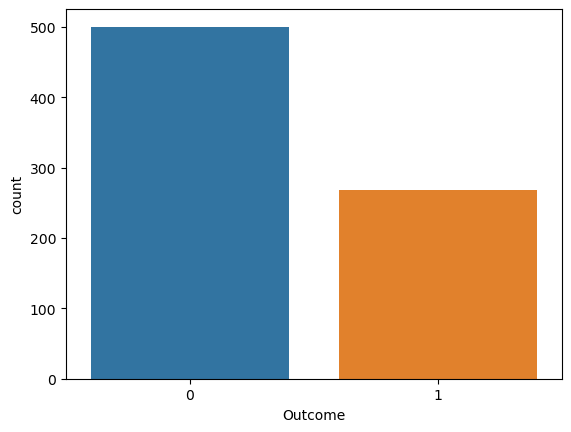

In [50]:
sns.countplot(x=df["Outcome"])

In [51]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

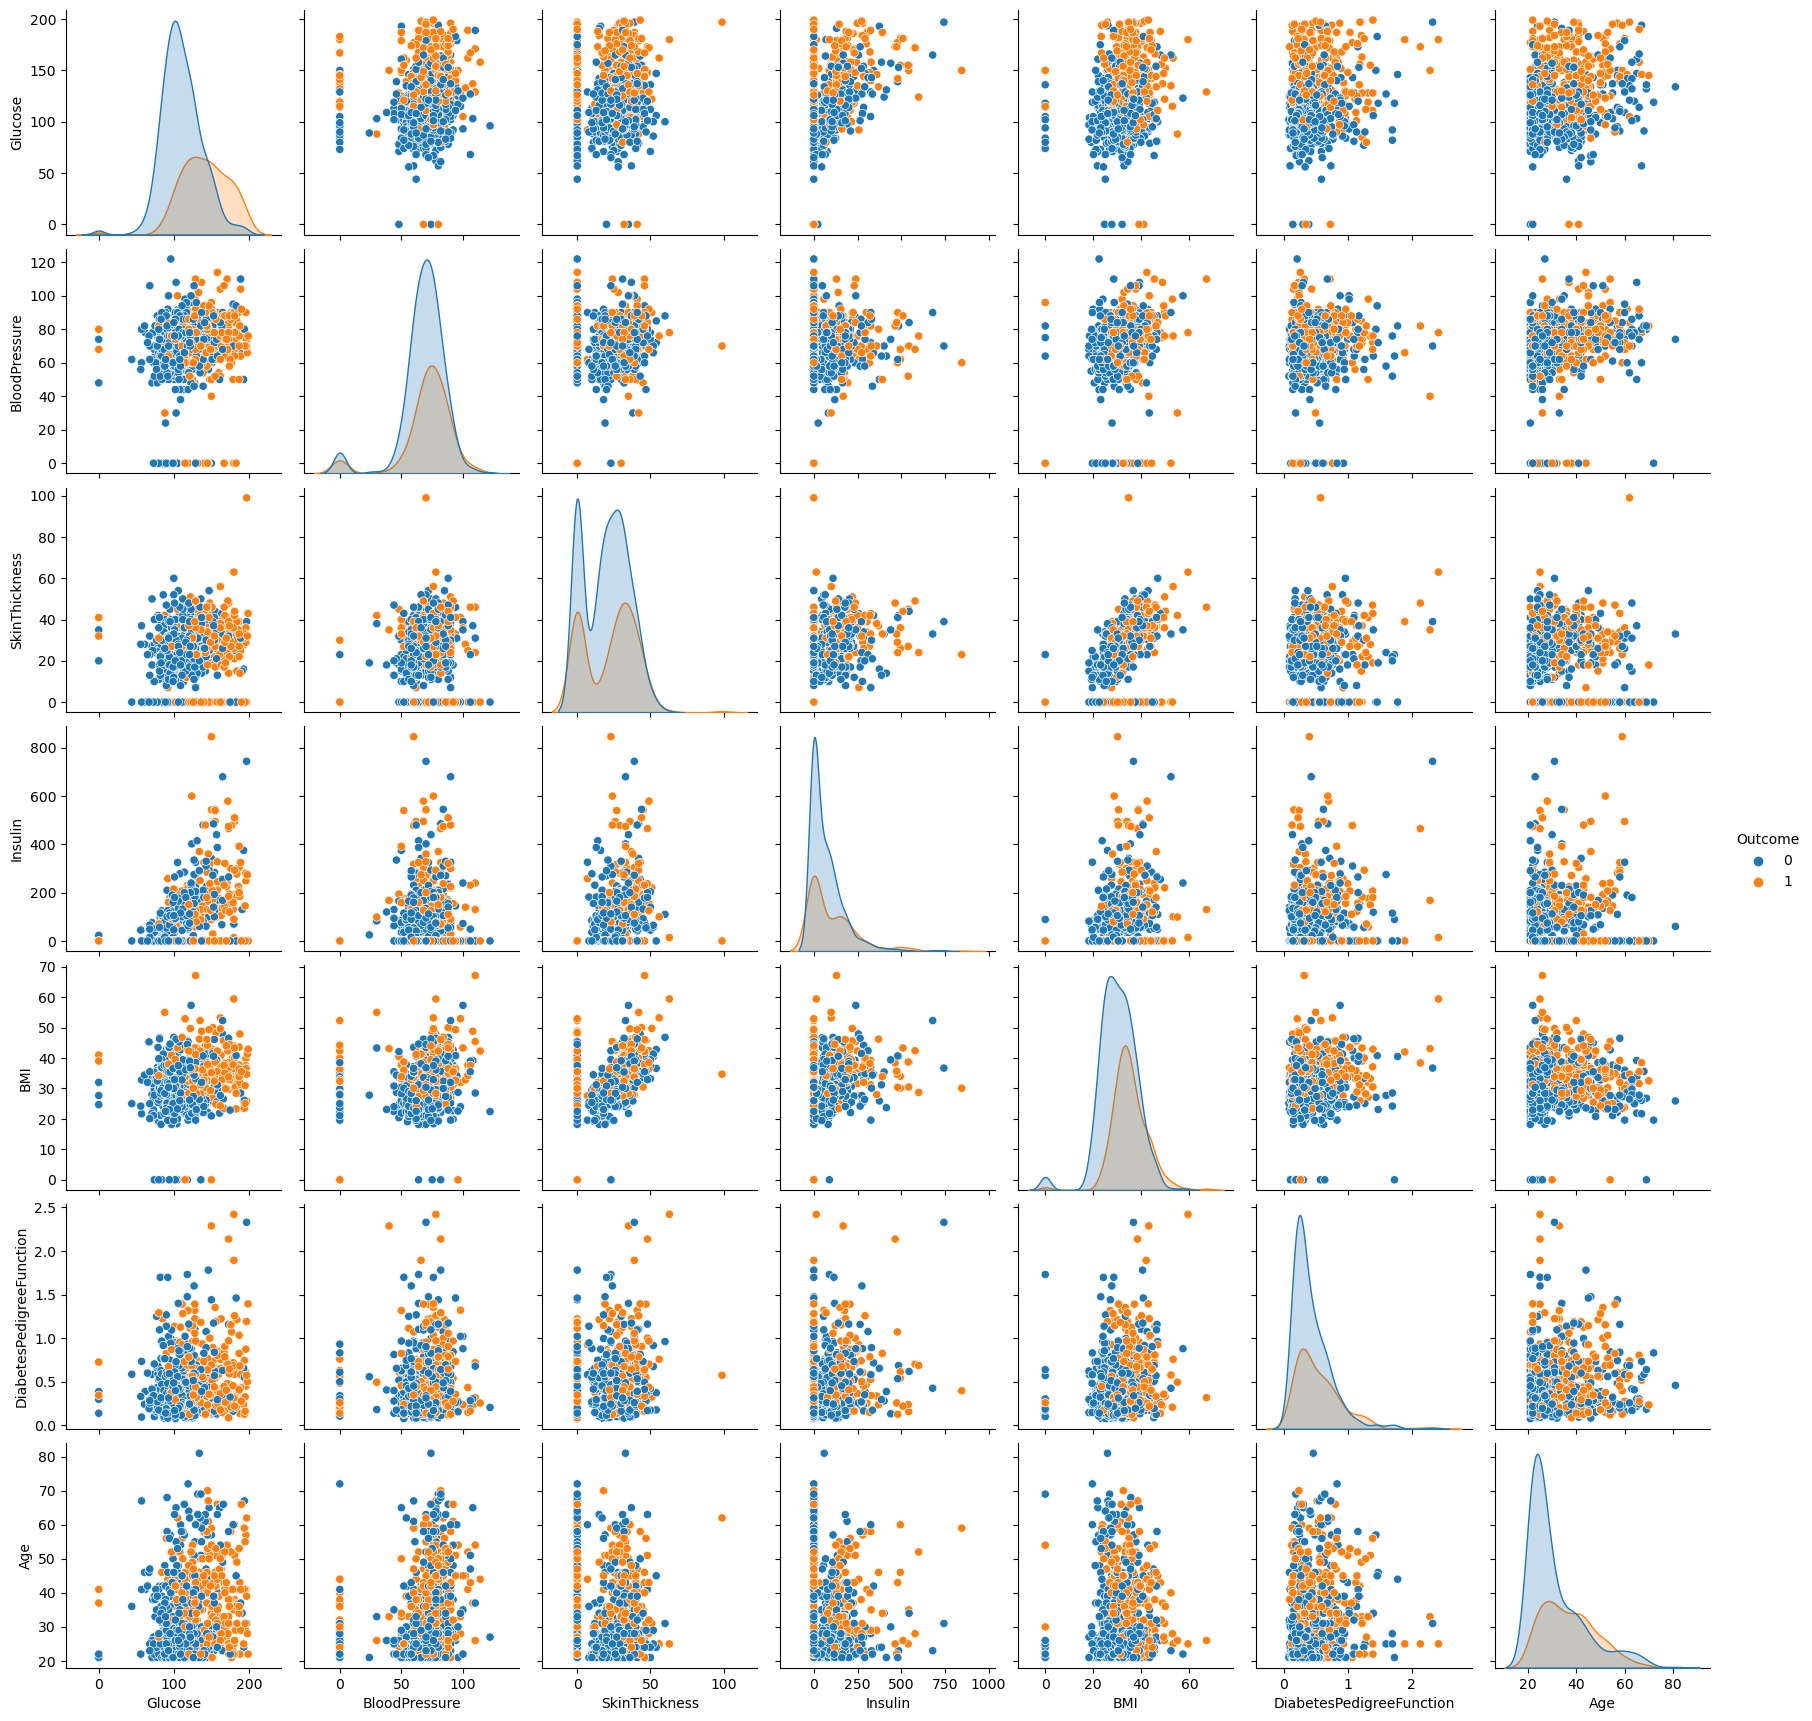

In [52]:
sns.pairplot(df,hue="Outcome")

## Model Building

In [53]:
x = df.drop("Outcome",axis=1)
y = df["Outcome"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0,stratify=y)

## Feature Scaling 

### using Standarization method

#### 1. Normalization

In [63]:
x_df=df.drop("Outcome",axis=1)

In [64]:
normal_scalar=MinMaxScaler()
array=normal_scalar.fit_transform(x_df)

x_normal_df=pd.DataFrame(array,columns=x_df.columns)
x_normal_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.743719,0.409836,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.516667
3,0.753769,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.753769,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...
763,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


#### 2 Standardization

In [65]:
std_scalar=StandardScaler()

array=std_scalar.fit_transform(x_df)

x_std_df=pd.DataFrame(array,columns=x_df.columns)
x_std_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.845787,-0.985618,0.907270,-0.692891,0.204013,0.468492,1.426022
1,-1.136319,-0.158966,0.530902,-0.692891,-0.684422,-0.365061,-0.190927
2,1.946957,-0.262298,-1.288212,-0.692891,-1.103255,0.604397,1.596227
3,0.908711,-0.158966,0.154533,0.123302,-0.494043,-0.920763,-1.041953
4,0.908711,-1.502276,0.907270,0.765836,1.409746,5.484909,-0.020722
...,...,...,...,...,...,...,...
763,-0.632927,0.357691,1.722735,0.870031,0.115169,-0.908682,2.532356
764,0.027775,0.047697,0.405445,-0.692891,0.610154,-0.398282,-0.531337
765,-0.003687,0.151028,0.154533,0.279594,-0.735190,-0.685193,-0.276029
766,0.153623,-0.468961,-1.288212,-0.692891,-0.240205,-0.371101,1.170715


In [67]:
model_details=[]
testing_accuracy_list=[]
training_accuracy_list=[]

In [68]:
# regular Model
x=df.drop('Outcome',axis=1)
y=df['Outcome']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

model_details.append("Regular Model")

knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

In [69]:
# for normalization
x=x_normal_df.copy()
y=df["Outcome"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

model_details.append("Normalization Model")

knn_clf_normal=KNeighborsClassifier()
knn_clf_normal.fit(x_train,y_train)

KNeighborsClassifier()

In [70]:
# For Standardization
x = x_std_df.copy()
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

model_details.append("Standardization Model")

knn_clf_std=KNeighborsClassifier()
knn_clf_std.fit(x_train,y_train)

KNeighborsClassifier()

## Model evaluation¶

In [71]:
def testing_eval(model,x,y):
    y_pred_test=model.predict(x)

    cnf_matrix=confusion_matrix(y,y_pred_test)
    print("Confusion Matrix --->\n",cnf_matrix)

    print("*"*60)

    accuracy=accuracy_score(y,y_pred_test)
    print("Accuracy is -->",accuracy)
    testing_accuracy_list.append(accuracy)

    print("*"*60)

    clf_report=classification_report(y,y_pred_test)
    print("Classification report -->\n",clf_report)
    
    return y_pred_test

In [72]:
def training_eval(model,x,y):
    y_pred_train=model.predict(x)

    cnf_matrix=confusion_matrix(y,y_pred_train)
    print("Confusion Matrix --->\n",cnf_matrix)

    print("*"*60)

    accuracy=accuracy_score(y,y_pred_train)
    print("Accuracy is -->",accuracy)
    
    training_accuracy_list.append(accuracy)

    print("*"*60)

    clf_report=classification_report(y,y_pred_train)
    print("Classification report -->\n",clf_report)
    
    return y_pred_train

In [73]:
testing_eval(knn_clf,x_test,y_test)

Confusion Matrix --->
 [[100   0]
 [ 54   0]]
************************************************************
Accuracy is --> 0.6493506493506493
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.65      1.00      0.79       100
           1       0.00      0.00      0.00        54

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [74]:
training_eval(knn_clf,x_train,y_train)

Confusion Matrix --->
 [[400   0]
 [214   0]]
************************************************************
Accuracy is --> 0.6514657980456026
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.65      1.00      0.79       400
           1       0.00      0.00      0.00       214

    accuracy                           0.65       614
   macro avg       0.33      0.50      0.39       614
weighted avg       0.42      0.65      0.51       614



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [75]:
testing_eval(knn_clf_normal,x_test,y_test)

Confusion Matrix --->
 [[89 11]
 [32 22]]
************************************************************
Accuracy is --> 0.7207792207792207
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.74      0.89      0.81       100
           1       0.67      0.41      0.51        54

    accuracy                           0.72       154
   macro avg       0.70      0.65      0.66       154
weighted avg       0.71      0.72      0.70       154



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [76]:
training_eval(knn_clf_normal,x_train,y_train)

Confusion Matrix --->
 [[369  31]
 [111 103]]
************************************************************
Accuracy is --> 0.7687296416938111
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.77      0.92      0.84       400
           1       0.77      0.48      0.59       214

    accuracy                           0.77       614
   macro avg       0.77      0.70      0.72       614
weighted avg       0.77      0.77      0.75       614



array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [77]:
testing_eval(knn_clf_std,x_test,y_test)

Confusion Matrix --->
 [[84 16]
 [24 30]]
************************************************************
Accuracy is --> 0.7402597402597403
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       100
           1       0.65      0.56      0.60        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.74      0.73       154



array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0],
      dtype=int64)

In [78]:
training_eval(knn_clf_std,x_train,y_train)

Confusion Matrix --->
 [[353  47]
 [ 66 148]]
************************************************************
Accuracy is --> 0.8159609120521173
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       400
           1       0.76      0.69      0.72       214

    accuracy                           0.82       614
   macro avg       0.80      0.79      0.79       614
weighted avg       0.81      0.82      0.81       614



array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

## HyperParameter Tuning

In [81]:
knn_clf=KNeighborsClassifier()
param_grid={"n_neighbors" :np.arange(3,30),"p":[1,2]}

gscv_knn_clf=GridSearchCV(knn_clf,param_grid)
gscv_knn_clf.fit(x_train,y_train)
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=21)

In [82]:
gscv_knn_clf.best_params_

{'n_neighbors': 21, 'p': 2}

In [83]:
knn_clf = gscv_knn_clf.best_estimator_

y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy)
print("*"*60)

testing_accuracy_list.append(accurracy)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[84 16]
 [28 26]]
************************************************************
Accuracy is --> 0.7142857142857143
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.75      0.84      0.79       100
           1       0.62      0.48      0.54        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



In [84]:
# Training Data
knn_clf = gscv_knn_clf.best_estimator_
y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy)
print("*"*60)

training_accuracy_list.append(accurracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[364  36]
 [ 86 128]]
************************************************************
Accuracy is --> 0.8013029315960912
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       400
           1       0.78      0.60      0.68       214

    accuracy                           0.80       614
   macro avg       0.79      0.75      0.77       614
weighted avg       0.80      0.80      0.79       614



In [85]:
with open("KNN_model.pkl", "wb") as f:
    pickle.dump(knn_clf, f)

In [86]:
with open("Scaling.pkl", "wb") as f:
    pickle.dump(std_scalar, f)

In [87]:
column_names=x.columns

In [88]:
json_data={"columns":list(column_names)}
json_data

{'columns': ['Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age']}

In [89]:
with open("project_data.json","w") as f:
    json.dump(json_data,f)

In [92]:
Glucose=150.000
BloodPressure=60.000
SkinThickness=45.000
Insulin=0.000
BMI=73.600
DiabetesPedigreeFunction=0.627
Age=40.000

In [93]:
test_array = np.array([Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age], ndmin = 2)

#  scaling array as std scaling gives better accuracy
scaled_array = std_scalar.transform(test_array)

predicted_value = knn_clf.predict(scaled_array)[0]
if predicted_value==1:
    print("Person is having Diabetics")
else:
    print("Congratulations Patient is Healthy")

Person is having Diabetics
